<a href="https://colab.research.google.com/github/vitorkol/decision-tree/blob/main/arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas do Pandas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Lendo um arquivo diretamente de uma url**

In [2]:
#Lendo o dataset a ser utilizado no exercício
url = "https://raw.githubusercontent.com/vitorkol/decision-tree/main/dataset/diabetes.csv"
base_diabetes = pd.read_csv(url, sep = ';')

In [3]:
base_diabetes

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Identificando os dados e seus repectivos tipos**

Essa análise inicial permite ter uma visão dos tipos de daos e os possíveis tipos de tratamento.

In [4]:
base_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gravidez                768 non-null    int64  
 1   glicose                 768 non-null    int64  
 2   pressao_sangue          768 non-null    int64  
 3   espessura_pele          768 non-null    int64  
 4   insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   predisposicao_diabetes  768 non-null    float64
 7   idade                   768 non-null    int64  
 8   diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
base_diabetes.head()

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
base_diabetes.describe()

,gravidez,glicose,pressao_sangue,espessura_pele,insulina,IMC,predisposicao_diabetes,idade,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
base_diabetes.isna().sum()

gravidez                  0
glicose                   0
pressao_sangue            0
espessura_pele            0
insulina                  0
IMC                       0
predisposicao_diabetes    0
idade                     0
diabetes                  0
dtype: int64

In [8]:
base_diabetes.groupby(['diabetes'])['diabetes'].count()

diabetes
0    500
1    268
Name: diabetes, dtype: int64

**Instalando a biblioteca imblearn**

Imblearn é uma bilbioteca utilizanda para tratar dados desbalanceados. A biblioeca oferece várias técnicas de reamostragem comumente usadas em conjuntos de dados que mostram um forte desequilíbrio entre as classes.

In [9]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

**Definindo o conjunto de dados para e armazenando nas variáveis features e target**

Nesta etapa, vamos separar os conjuntos de dados em duas bases para analisarmos, sendo elas:

x_dados contém todas as features (gravidez, glicose,pressao_sangue, etc) de cada amostra.
y_dados contém apenas o target (possui diabetes/não possui diabetes)

In [10]:
x_dados = base_diabetes.drop('diabetes', axis=1).values # todos atributos menos a variavel label 
y_dados = base_diabetes['diabetes'].values # os labels diabetes ou não 

**Criando função para balancear os dados**

UnderSampler é um método consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias.

In [11]:
def balanceamento_dados(x_dados, y_dados):
    undersample = RandomUnderSampler(random_state = 42)
    x_under, y_under = undersample.fit_resample(x_dados, y_dados)
    #trabalha com atípicos em um conjunto de dados denominados outliers
    tl = TomekLinks(sampling_strategy='all') 
    x_under, y_under  = tl.fit_resample(x_under, y_under)
    return x_under, y_under

In [12]:
#Aplicando técnica de balanceamento na base de dados
x_dados_balanceados, y_dados_balanceados = balanceamento_dados(x_dados, y_dados)

**Formas de visualizar e analisar o balanceamento realizado**

In [13]:
#Nesta visualização, iremos Analisando os dados do balanceamento realizado nas variáveis x e y
print(len(x_dados_balanceados), len(y_dados_balanceados))

456 456


In [14]:
#Nesta visualização iremos importar a biblioteca collections, outra forma de analisar o balanceamento na variável y
import collections
print(collections.Counter(y_dados_balanceados))

Counter({0: 228, 1: 228})


In [15]:
#Nesta visualização temos como saída uma lista com dados balaceados
y_dados_balanceados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
#Nesta visualização temos os dados balanceados através de um dataframe
df_dados_balanceados = pd.DataFrame(y_dados_balanceados,columns=['diabetes'])
df_dados_balanceados.groupby('diabetes')['diabetes'].count()

diabetes
0    228
1    228
Name: diabetes, dtype: int64

**Criando função para realizar separação entre o conjunto de treinamento e teste**

Para que o modelo de árvore de decisão tenha êxito, é necessário separamos nosso dataset em um conjunto de dados para treinar o modelo e um conjunto de dados para testa-lo.

Importando a biblioteca Train Test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Definindo a função de treino e teste
def separa_treino_teste(X_dados_balanceados, y_dados_balanceados):
    x_train, x_test, y_train, y_test = train_test_split(x_dados_balanceados, y_dados_balanceados, random_state=42, test_size =0.2)
    return x_train, x_test, y_train, y_test

In [19]:
#Separando os dados em dois conjuntos, sendo eles: de treino e teste 
x_train, x_test, y_train, y_test = separa_treino_teste(x_dados_balanceados, y_dados_balanceados)

In [20]:
#Analisando a saida dos dados de treinamento e teste
print(f'''O modelo de TREINAMENTO irá utilizar para seu aprendizado, {len(x_train)} registros da classe X e {len(y_train)} registros da classe Y
O modelo de TESTE irá utilizar para o seu aprendizado, {len(x_test)} registros da classe X e {len(y_test)} registros da classe Y
''')

O modelo de TREINAMENTO irá utilizar para seu aprendizado, 364 registros da classe X e 364 registros da classe Y
O modelo de TESTE irá utilizar para o seu aprendizado, 92 registros da classe X e 92 registros da classe Y



**Criando árvore de decisão**

Importanto a biblioteca Tree


In [21]:
from sklearn import tree

In [22]:
#Definindo a classificação da árvore de decisão
algoritmo_arvore = tree.DecisionTreeClassifier()
modelo = algoritmo_arvore.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

**Verificando a importância de cada feature no modelo**

É muito importânte visualizar a importância de cada feature representada no modelo. Para isso, temos a função feature importances que nos auxilia ver o resultado desse dado.



In [23]:
print(modelo.feature_importances_)

[0.04197519 0.39136029 0.04218448 0.0679075  0.0420741  0.20620033
 0.04214075 0.16615736]


In [24]:
base_diabetes.columns

Index(['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade', 'diabetes'],
      dtype='object')

In [25]:
pd.DataFrame(modelo.feature_importances_, columns =['importancia'],
        index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
        'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False
)

,importancia
glicose,0.391360
IMC,0.206200
idade,0.166157
espessura_pele,0.067907
pressao_sangue,0.042184
predisposicao_diabetes,0.042141
insulina,0.042074
gravidez,0.041975


In [26]:
modelo.classes_

array([0, 1])

In [27]:
nomes_features = ['gravidez','glicose','pressao_sangue',
                  'espessura_pele','insulina','IMC',
                  'predisposicao_diabetes','idade']

nomes_classes = ['NÃO DIABETICO','DIABETICO']

**Instalando biblioteca para visualização da árvore de decisão**

Graphviz é um software de visualização de gráficos de código aberto. A visualização de gráficos é uma forma de representar informações estruturais como diagramas de gráficos abstratos e redes.

link acesso: https://graphviz.org/

In [28]:
# graphviz is installed already, but need lib too
!pip install pygraphviz
!apt install libgraphviz-dev

In [29]:
import graphviz
def visualiza_arvore(modelo):   
    arvore = tree.export_graphviz(modelo, 
                    feature_names=nomes_features,
                    class_names=nomes_classes,
                    rounded=True,
                    special_characters=True, filled=True)
    graph = graphviz.Source(arvore)  
    return graph

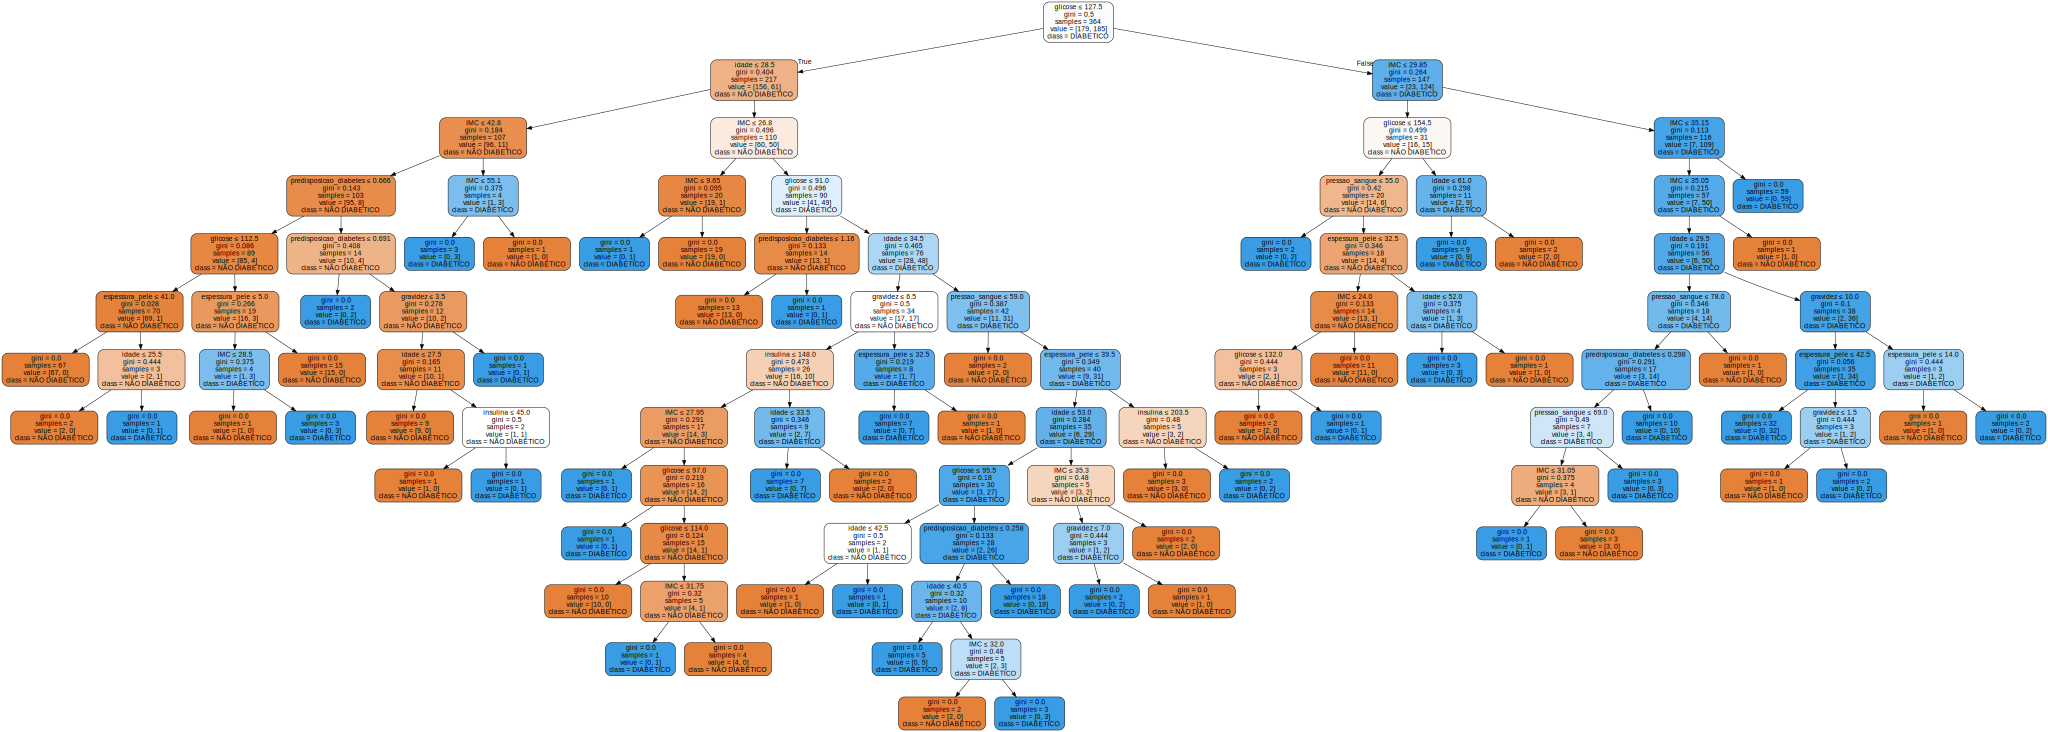

In [30]:
#Visualização da arvóre completa
visualiza_arvore(modelo)

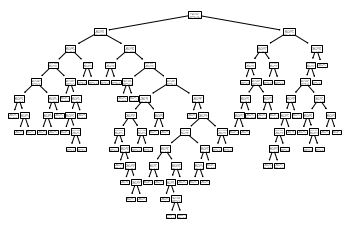

In [31]:
#Visualiza estrutura da árvore 
tree.plot_tree(modelo)
plt.show()

**Calculando acurácia do modelo**

A acurácia é uma das metricas que podemos utilizar para avaliar um modelo de machine learning. A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior o nível de acuracidade, mais próximo da referência ou valor real é o resultado encontrado.
Importando a biblioteca accuracy_score

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.7391304347826086

**Criando função que gera features de importância para o modelo**


Vamos criar funções para retornar os resultados de várias árvores de decisão para análises futuras.

In [34]:
def gera_features_importantes(modelo):
    df = pd.DataFrame(modelo.feature_importances_, columns =['importancia'],
             index = ['gravidez', 'glicose', 'pressao_sangue', 'espessura_pele', 'insulina',
       'IMC', 'predisposicao_diabetes', 'idade']).sort_values('importancia', ascending=False)
    return df

In [35]:
print(gera_features_importantes(modelo))

                        importancia
glicose                    0.391360
IMC                        0.206200
idade                      0.166157
espessura_pele             0.067907
pressao_sangue             0.042184
predisposicao_diabetes     0.042141
insulina                   0.042074
gravidez                   0.041975


In [36]:
#Cria diretório para salvar imagens das árvores geradas
PATH_IMG = r'/content/arvores_geradas/'

In [37]:
def cria_modelo(x_train, y_train, y_test, tamanho_arvore):
    
    algoritmo_arvore = tree.DecisionTreeClassifier(max_depth=tamanho_arvore, random_state=42) # inicia a classificação da arvore de decisao
    modelo = algoritmo_arvore.fit(x_train, y_train)
    y_predido = modelo.predict(x_test)
    arvore = visualiza_arvore(modelo)
    
    #Salva arquivo pdf 
    arvore.render(f'{PATH_IMG}/modelo_tamanho_n{tamanho_arvore}')
    
    print(f'''Features com maior importância para o modelo:
            {gera_features_importantes(modelo)}
          ''')
    
    print('o valor da acuracia é : ', accuracy_score(y_test, y_predido))
            
    return arvore

Features com maior importância para o modelo:
                                    importancia
glicose                    0.701561
idade                      0.169830
IMC                        0.128609
gravidez                   0.000000
pressao_sangue             0.000000
espessura_pele             0.000000
insulina                   0.000000
predisposicao_diabetes     0.000000
          
o valor da acuracia é :  0.8043478260869565


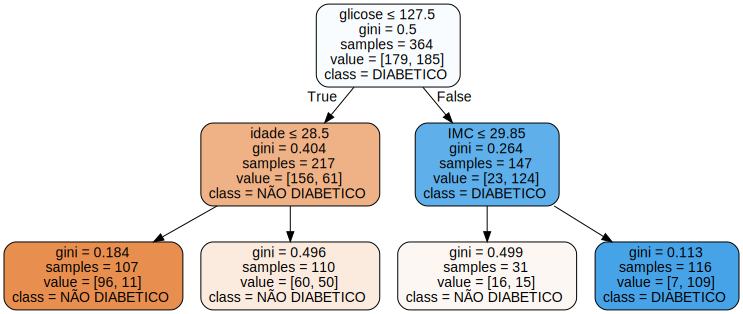

In [38]:
tamanho_arvore = 2
arvore = cria_modelo(x_train, y_train, y_test, tamanho_arvore)
arvore